In [ ]:
import numpy as np
import random
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt

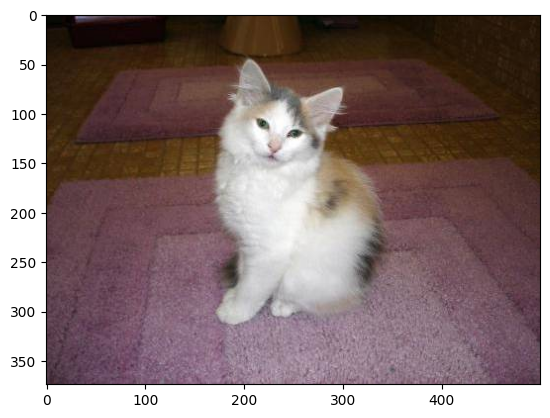

In [ ]:
img = plt.imread('test1/10.jpg')
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
def prepare_image_data(dir):
    img_size = 100
    data = []
    labels = {'cat' : 0, 'dog' : 1}

    for img in os.listdir(dir):
        label_str = img.split('.')[0]
        label = labels.get(label_str)
        if label is None:
            continue
        try:
            img_array = cv2.imread(os.path.join(dir, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            data.append([new_array, label])

        except Exception as e:
            pass

    return data

In [ ]:
training_data = prepare_image_data("train/")

In [ ]:
len(training_data)

25000

In [ ]:
training_data[:1]

[[array([[101,  74, 113, ...,  85, 126, 106],
         [ 75,  75,  84, ...,  68,  86,  94],
         [104,  79,  87, ...,  64,  60,  87],
         ...,
         [128, 139, 138, ...,  33,  49,  62],
         [125, 135, 147, ...,  79,  53,  61],
         [117, 135, 143, ...,  91,  92,  42]], dtype=uint8),
  1]]

In [ ]:
test_data = []
test_dir = "test1/"

for img in os.listdir(test_dir):
    img_array = cv2.imread(os.path.join(test_dir, img), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (100, 100))
    test_data.append([new_array])

In [ ]:
len(test_data)

12500

In [ ]:
# Shuffel Data

random.shuffle(training_data)
random.shuffle(test_data)
training_data[:1]

[[array([[163, 166, 167, ..., 189, 189, 188],
         [157, 157, 157, ..., 190, 190, 190],
         [147, 143, 143, ..., 191, 191, 191],
         ...,
         [ 30,  31,  32, ..., 173, 175, 176],
         [ 31,  32,  32, ..., 132, 133, 134],
         [ 31,  31,  31, ..., 126, 126, 126]], dtype=uint8),
  0]]

In [ ]:
test_data = np.array(test_data)
test_data.shape

(12500, 1, 100, 100)

In [ ]:
# Splite X, y

x = []
y = []

for feature, label in training_data:
    x.append(feature)
    y.append(label)

x = np.array(x)
y = np.array(y)

In [ ]:
y[:10]

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
x.shape

(25000, 100, 100)

In [ ]:
# Resize and scale
x = x.reshape(-1, 100, 100, 1) / 255.0
test_data = test_data.reshape(-1, 100, 100, 1) / 255.0

In [ ]:
x.shape

(25000, 100, 100, 1)

In [ ]:
test_data.shape

(12500, 100, 100, 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state=42)

In [ ]:
x_val.shape

(5000, 100, 100, 1)

### CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,646,721 (13.91 MB)

 Trainable params: 3,646,721 (13.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Fit Model

model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.4959 - loss: 0.6936 - val_accuracy: 0.5694 - val_loss: 0.6817
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.5660 - loss: 0.6801 - val_accuracy: 0.6438 - val_loss: 0.6395
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6467 - loss: 0.6312 - val_accuracy: 0.7230 - val_loss: 0.5548
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7248 - loss: 0.5512 - val_accuracy: 0.7610 - val_loss: 0.4951
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7499 - loss: 0.5143 - val_accuracy: 0.7684 - val_loss: 0.4765
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7701 - loss: 0.4792 - val_accuracy: 0.7808 - val_loss: 0.4576
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7778 - loss: 0.4692 - val_accuracy: 0.7776 - val_loss: 0.4590
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7867 - loss: 0.4512 - 

In [ ]:
model.save(r'model_xray.h5')

In [ ]:
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

model = load_model('model_xray.h5')

prediction = model.predict(test_data[:1])
print(prediction)
print(round(prediction[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
[[0.9636855]]
1


In [ ]:
import pandas as pd

prediction = model.predict(test_data)
prediction_op = [round(i[0]) for i in prediction]

test_dir = "test1/"
test_file = sorted(os.listdir(test_dir))

df = pd.DataFrame({
    'id': [f.split('.')[0] for f in test_file],
    'label': prediction_op
})

df.to_csv('submission.csv', index=False)

391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
# 11550.jpg  1907.jpg   3514.jpg	5121.jpg  672.jpg   8337.jpg  9945.jpg
# 11551.jpg  1908.jpg   3515.jpg	5122.jpg  6730.jpg  8338.jpg  9946.jpg
# 11552.jpg  1909.jpg   3516.jpg	5123.jpg  6731.jpg  8339.jpg  9947.jpg
# 11553.jpg  190.jpg    3517.jpg	5124.jpg  6732.jpg  833.jpg   9948.jpg
# 11554.jpg  1910.jpg   3518.jpg	5125.jpg  6733.jpg  8340.jpg  9949.jpg
# 11555.jpg  1911.jpg   3519.jpg	5126.jpg  6734.jpg  8341.jpg  994.jpg
# 11556.jpg  1912.jpg   351.jpg	5127.jpg  6735.jpg  8342.jpg  9950.jpg
# 11557.jpg  1913.jpg   3520.jpg	5128.jpg  6736.jpg  8343.jpg  9951.jpg
# 11558.jpg  1914.jpg   3521.jpg	5129.jpg  6737.jpg  8344.jpg  9952.jpg
# 11559.jpg  1915.jpg   3522.jpg	512.jpg   6738.jpg  8345.jpg  9953.jpg
# 1155.jpg   1916.jpg   3523.jpg	5130.jpg  6739.jpg  8346.jpg  9954.jpg
# 11560.jpg  1917.jpg   3524.jpg	5131.jpg  673.jpg   8347.jpg  9955.jpg

In [ ]:
def prepare_external_image(image_path):
    import cv2
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    return img.reshape(1, 100, 100, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1


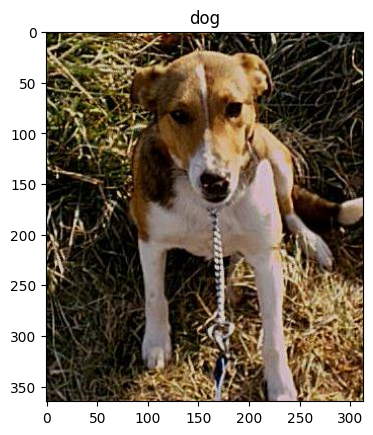

In [ ]:
image = 'test1/9955.jpg'
prediction = model.predict(prepare_external_image(image))
pred_label = round(prediction[0][0])

print(round(prediction[0][0]))
label = "dog" if pred_label == 1 else "cat"

img = plt.imread(image)
plt.imshow(img, cmap='gray')
plt.title(label)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8333 - loss: 0.3673
Accuracy: 0.8288
